# Assignment #2

Equipped with the Boston Housing Study data, I set out to explore how well machine learning algorithms could complement conventional methods for assessing the market value of residential real estate in Boston circa 1970. 

Supervised machine learning techniques were used within this study. Python’s Sci-kit learn was the predominant environment used for this development work. The linear models evaluated were Linear Regression, Ridge Regression, Lasso Regression and Elastic Net. In order to train the models, 80% of the available data was used to form the training set while the other 20% served as the test data set. Each regression algorithm was evaluated with a K-fold cross-validation technique with 10 folds and the root mean squared error was used as the index for prediction error. 

To conduct this work effectively, the Boston Housing Data was first inspected and visualized to gain understanding. The data consisted of 506 census tracts made up of 13 features and one label; the median value of Boston homes in thousands of 1970s US dollars (identified as mv from here on out). The neighborhood feature was eliminated from this analysis as a categorical variable and a second label was engineered; the log median value of homes (identified as lmv from here on out). Summary statistics, univariate distributions, and bivariate relationships for the attributes were explored during the initial EDA phase of this work. The data was transformed with StandardScaler and arrays for the features and labels were established to train and validate the regression algorithms. Each regression model was evaluated by computing the RMSE and R2 score for the training data sets for each label (mv and lmv). In order to better quantify the model performances, K-fold cross-validation was used to provide the average and standard deviation RMSE statistics for each regression model. Ridge, Lasso, and Elastic Net algorithms were optimized by tuning their hyperparameters. Learning curves were utilized to further evaluate each model. This process yielded three potential regression models to facilitate traditional market valuation methods. Once these top performing models were identified, they were finally tested to verify accuracy and ability to generalize their predictive abilities to arbitrary data. 

While conducting this work I found that scaling the labels for the supervised models, as opposed to not scaling the labels and only scaling the features, helped to better compare models when different labels were used. Since lmv is a derivative of mv, it was desirable to understand if mv or lmv led to more accurate models. Without scaling these labels via standardization, the RMSE for each model would output values with different units making it difficult to determine which model was performing better. Therefore, when working with engineered labels, it is recommended to scale the labels to ensure the labels are unitless and the models are comparable. This will help determine which label will optimize the predictive power of the algorithms. 

It was found that the lmv label yielded more accurate models compared to using mv labels. When using the mv label, LinearRegression yielded an RMSE of 0.512 and an R2 score of 0.745. The lmv labels yielded an RMSE of 0.461 and R2 score of 0.790 with the same LinearRegression algorithm. Similar improvements were found when using lmv labels instead of mv labels for each linear model. This finding was supported by smaller average and standard deviation RMSE outputs for each model when evaluated with K-fold cross-validation. It is recommended that the lmv labels be used for training and maintaining linear models for the Boston Housing Study data. 

Of the models evaluated, Ridge Regression proved to perform the best followed by Lasso Regression and Linear Regression, respectively. The Elastic Net algorithm was inferior to the other linear models. For this data, Ridge Regression was optimized with an alpha value of 10 while Lasso Regression performed best with an alpha of 0.001. Each regularized linear model yielded a lower average and standard deviation RMSE when compared to simple Linear Regression when evaluated with K-fold cross-validation. This allows the conclusion that constraining the simple linear model helps improve overall performance. The K-fold cross-validation evaluation technique led to the conclusion that Ridge Regression with an alpha equal to 10 while using the scaled lmv labels would provide the best predictive model for the Boston Housing Study data. With an average RMSE of 0.48 and standard deviation of 0.044, the Ridge Regression model is capable of predicting the market value of residential Boston real estate with an average error of only 1.2 and standard deviation of 1.02 thousands of 1970s dollars.


## Set up work space and read in the data:

In [1]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for initial EDA of data
import seaborn as sns # for initial EDA of data
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = 15, 7.5

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
#Read in the data from my local drive:
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston (1).csv


In [4]:
#Read in the dataframe
import io
boston = pd.read_csv(io.BytesIO(uploaded['boston.csv']))

In [5]:
#Look at the head of the dataframe:
boston.head()

neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]

In [6]:
#Drop the neighborhood column
boston = boston.drop('neighborhood',1)
boston.head()

crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat    mv
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]

In [7]:
#Add in the log mv column:
boston['lmv'] = np.log(boston['mv'])
boston.head()

crim    zn  indus  chas    nox  ...  tax  ptratio  lstat    mv       lmv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3   4.98  24.0  3.178054
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8   9.14  21.6  3.072693
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8   4.03  34.7  3.546740
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7   2.94  33.4  3.508556
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7   5.33  36.2  3.589059

[5 rows x 14 columns]

# Inspect the data / EDA:

In [8]:
#Make copy of boston df for exploration:
df = boston
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
 13  lmv      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There are no missing values in this dataset. Looks like by dropping the neighborhood column there are only numeric values. 506 rows, 12 features, and 2 columns of labels.

Next let's get a better understanding of what type of data we are looking at:

 - neighborhood: Name of the Boston Neighborhood
 - mv: Median value of homes in thousands of 1970 doallars
 - lmv: Natural Log Median value of homes
 - nox: Air Pollution (nitrogen oxide concentration)
 - crim: Crime Rate
 - zn: Percent of land zoned for lots
 - indus: Percent of business that is inudstrial or nonretial
 - chas: On the Charles River (1) or not (0)... binary / class data
 - rooms: Average number of rooms per home
 - age: Percentage of homes built before 1940
 - dis: Weighted distance to employment centers
 - rad: Accessibility to radial highways
 - tax: Tax Rate
 - ptratio: Pupil/teacher ratio in public schools
 - lstat: Percentage of population of lower socio-economic status

In [9]:
#Look at the descriptive statistics for the dataframe
df.describe().transpose()

count        mean         std  ...         50%         75%         max
crim     506.0    3.613524    8.601545  ...    0.256510    3.677082   88.976200
zn       506.0   11.363636   23.322453  ...    0.000000   12.500000  100.000000
indus    506.0   11.136779    6.860353  ...    9.690000   18.100000   27.740000
chas     506.0    0.069170    0.253994  ...    0.000000    0.000000    1.000000
nox      506.0    0.554695    0.115878  ...    0.538000    0.624000    0.871000
rooms    506.0    6.284634    0.702617  ...    6.208500    6.623500    8.780000
age      506.0   68.574901   28.148861  ...   77.500000   94.075000  100.000000
dis      506.0    3.795043    2.105710  ...    3.207450    5.188425   12.126500
rad      506.0    9.549407    8.707259  ...    5.000000   24.000000   24.000000
tax      506.0  408.237154  168.537116  ...  330.000000  666.000000  711.000000
ptratio  506.0   18.455534    2.164946  ...   19.050000   20.200000   22.000000
lstat    506.0   12.653063    7.141062  ...   11.360000   16.955000   37.970000
mv       506.0   22.528854    9.182176  ...   21.200000   25.000000   50.000000
lmv      506.0    3.034558    0.408275  ...    3.054001    3.218876    3.912023

[14 rows x 8 columns]

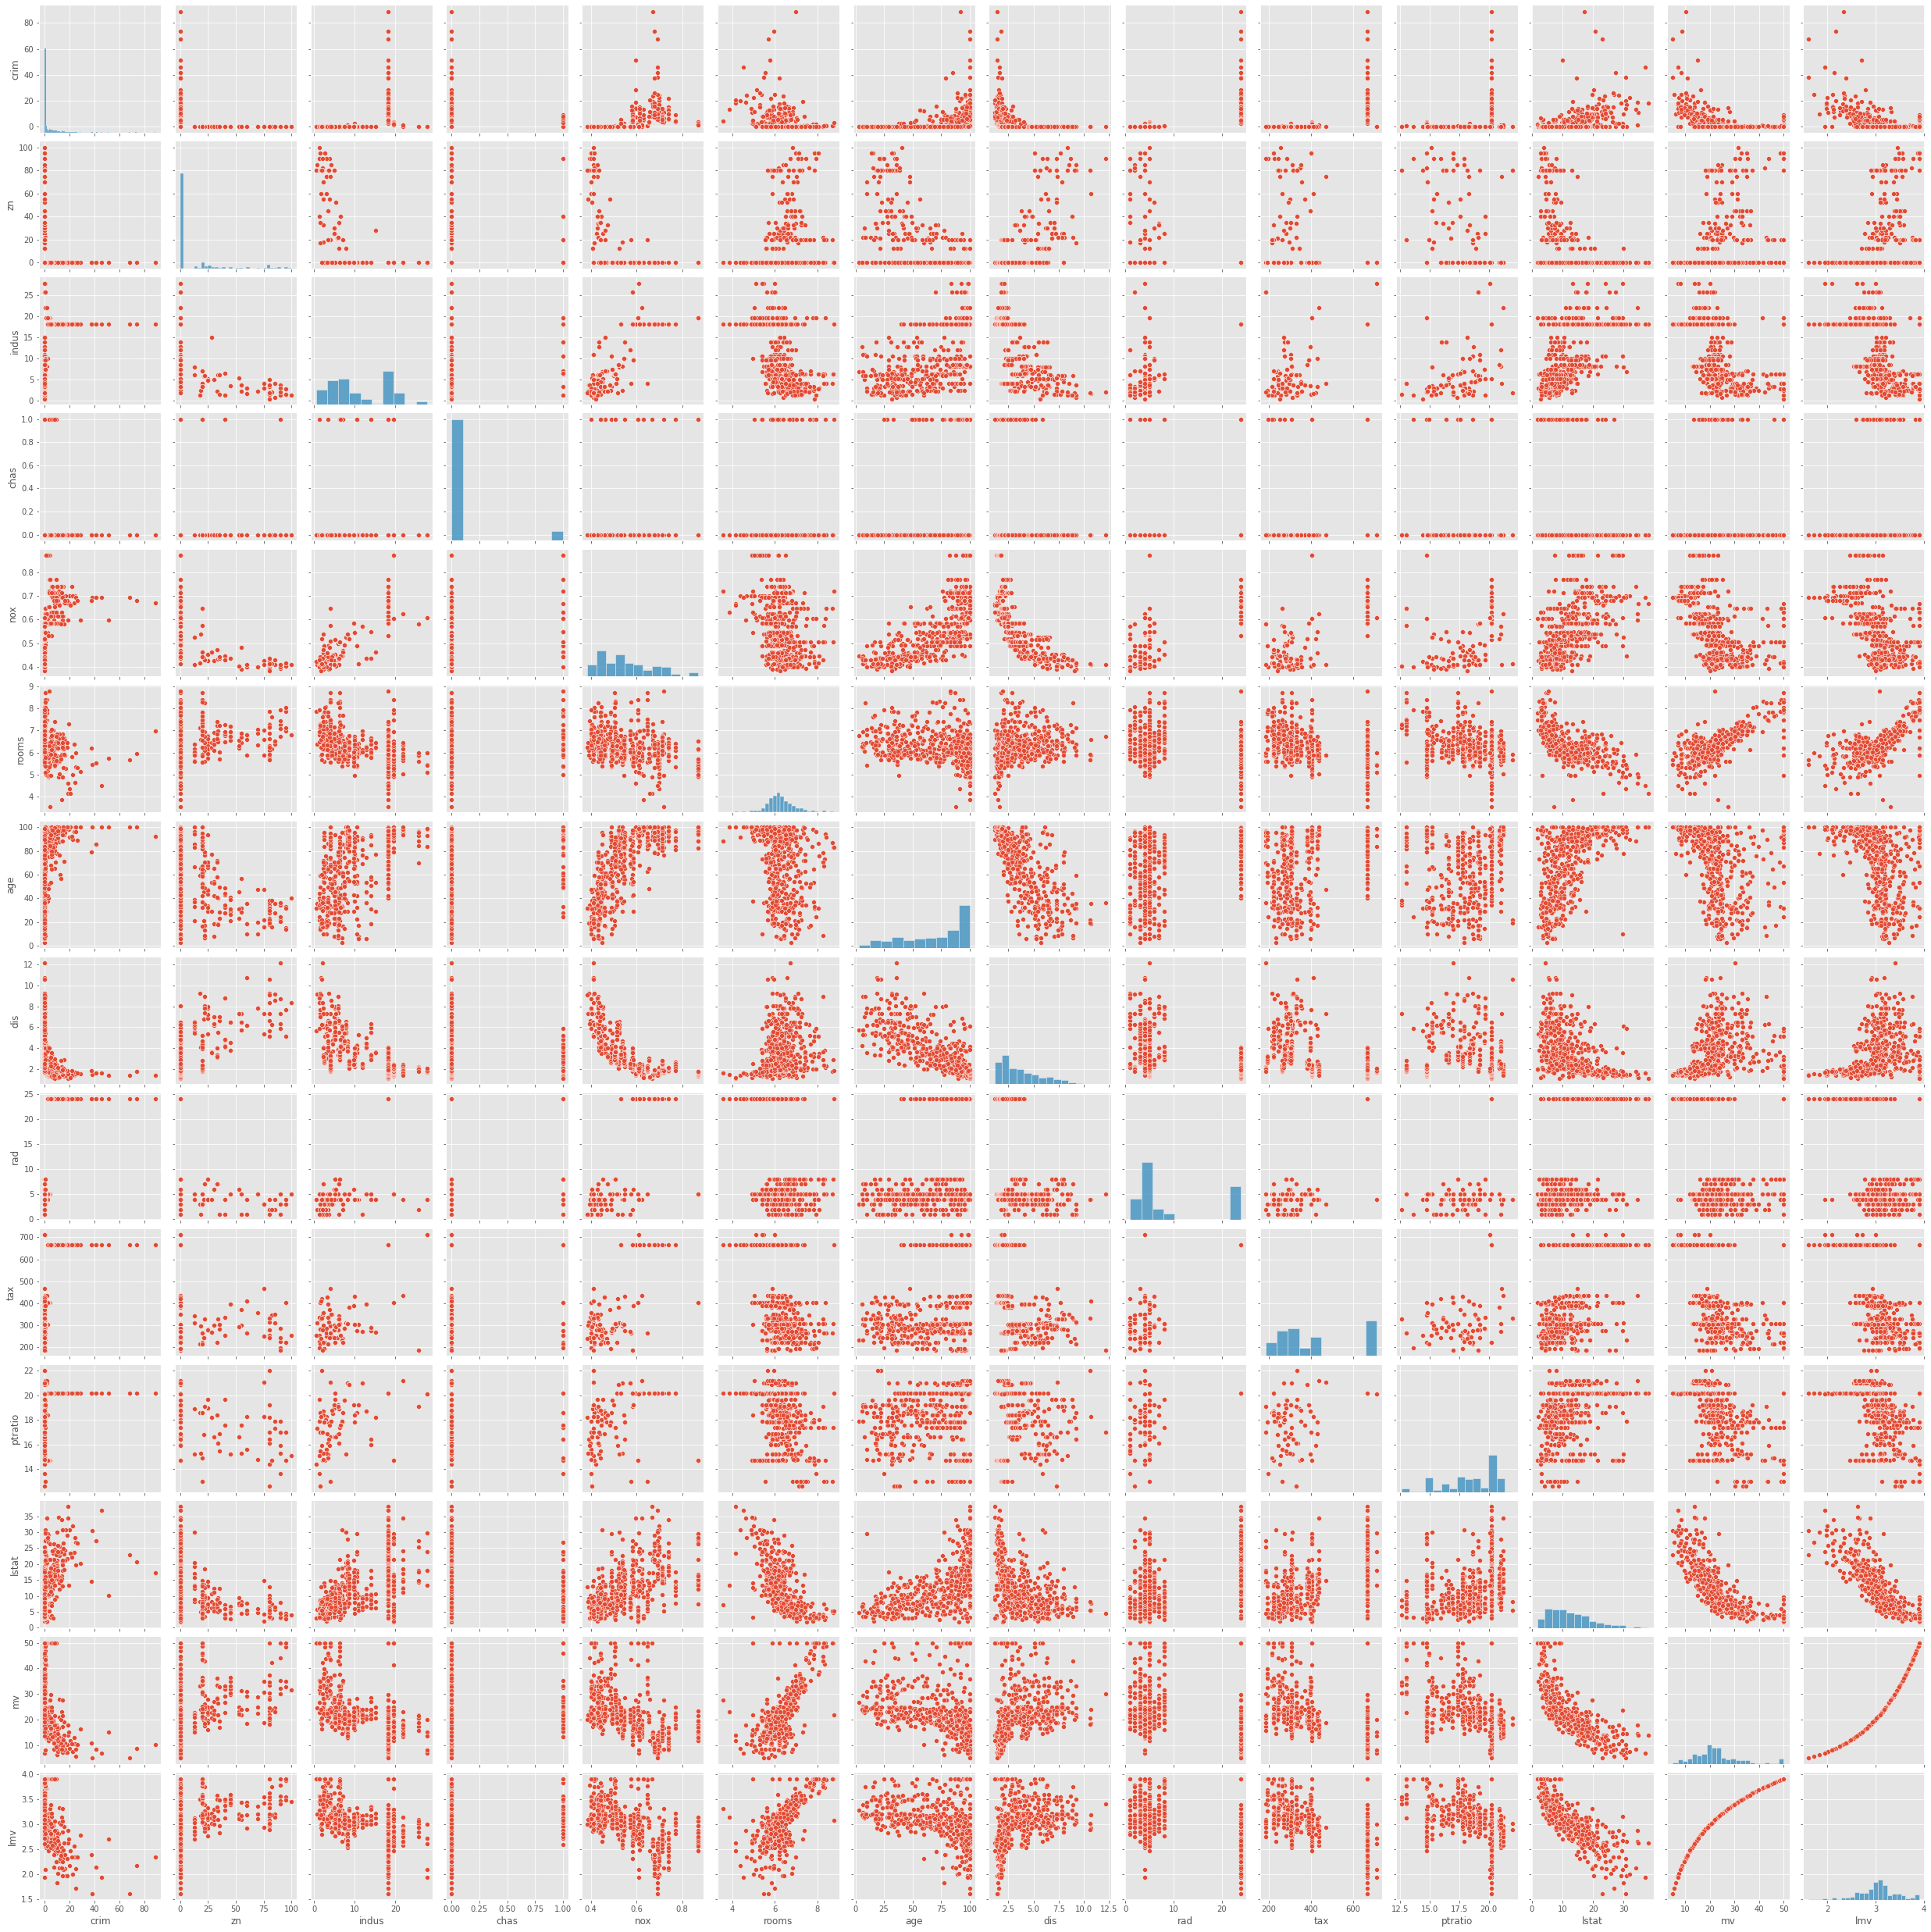

In [10]:
#Look at pair plot for bivariate relationships within the data:
sns.pairplot(df)
plt.show()

There are various degrees of correlation seen with the pair plot. However, many features appear to show very little correlation to one another.

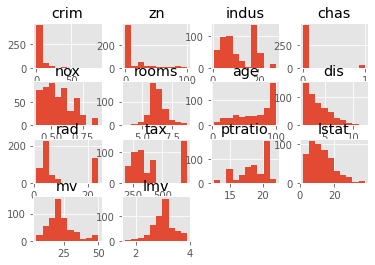

In [11]:
#Look at each features histogram:
df.hist()
plt.show()

Most data does not look normal, nor do the dataranges seem to have similar scales. Will want to scale the data for sure before running the regression algorithms.

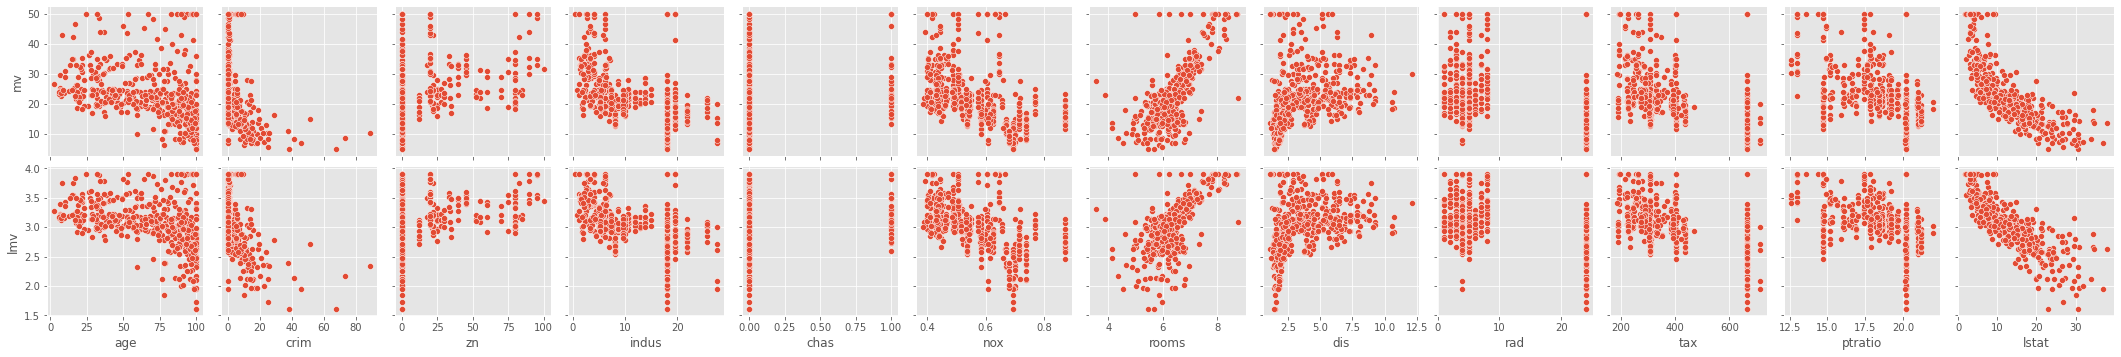

In [12]:
#Take a close look at how the features relate to the labels:
sns.pairplot(
    df,
    x_vars=['age','crim', 'zn', 'indus', 'chas', 'nox', 'rooms','dis', 'rad','tax', 'ptratio', 'lstat'],
    y_vars=["mv","lmv"]
)
plt.show()

From these pairplots, it looks like the strongest correlations to mv and lmv are lstat and rooms. Next are crim, tax, nox, and indus. Will creat a correlation heat map to verify.

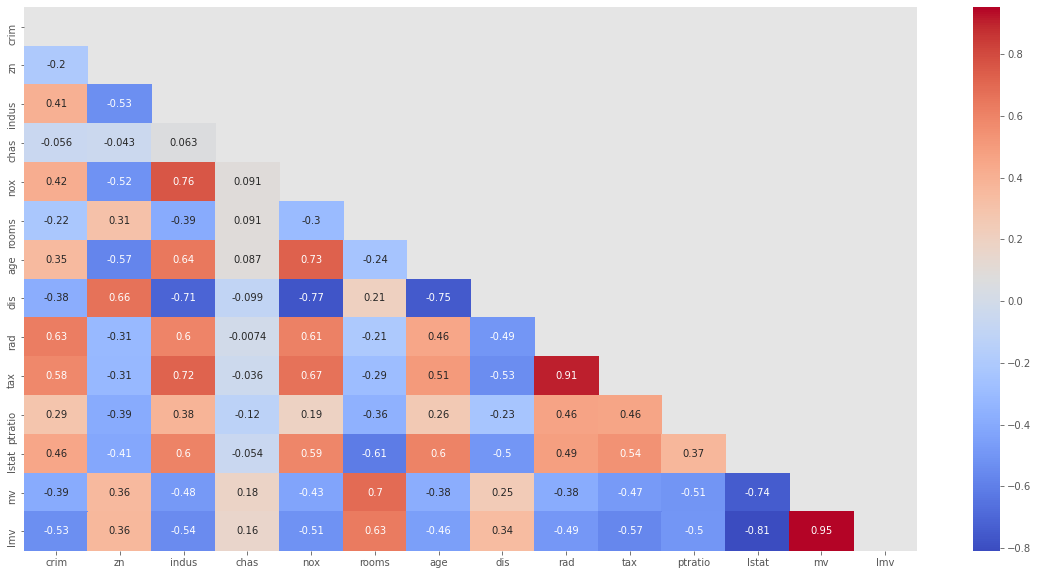

In [13]:
#Correlation heatmap:
matrix = np.triu(df.corr())
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, mask = matrix, cmap = 'coolwarm')
plt.show()

In [14]:
print(df.corr().mv.sort_values(ascending = False))
print(df.corr().lmv.sort_values(ascending = False))

mv         1.000000
lmv        0.952967
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64
lmv        1.000000
mv         0.952967
rooms      0.632536
zn         0.363396
dis        0.342527
chas       0.158569
age       -0.455029
rad       -0.486818
ptratio   -0.499433
nox       -0.513431
crim      -0.530001
indus     -0.543195
tax       -0.566214
lstat     -0.809234
Name: lmv, dtype: float64


This confirms that lstat and rooms are both strongest indicators for mv and lmv. There are varying degrees of correlation for each feature. The variables less likely to be impactful are chas, dis, and zn.

# Regression Models With Scaling Labels

In [15]:
#Scale all data, features and labels:
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston)

In [16]:
#Look at the shape of the scaled data:
print("boston_scaled.shape",boston_scaled.shape)
print("\nScaled Means:", scaler.mean_)
print("\nScale: ", scaler.scale_)


boston_scaled.shape (506, 14)

Scaled Means: [3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 1.26530632e+01
 2.25288538e+01 3.03455800e+00]

Scale:  [8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 7.13400164e+00
 9.17309810e+00 4.07871084e-01]


In [17]:
#Now split data into training data and test data
train, test = train_test_split(boston_scaled, test_size = 0.2, random_state = 42)

#Will use the 80/20 rule to split data.
#Keep random_state = 42 so training data is kept same each time ran.

In [18]:
#Get arrays of training features and scaled labels:
X_train = train[:,0:12]
mv_train = train[:,12]
lmv_train = train[:,13]
print("X_train.shape:", X_train.shape)
print("mv_train.shape:", mv_train.shape)
print("lmv_train.shape:", lmv_train.shape)

X_train.shape: (404, 12)
mv_train.shape: (404,)
lmv_train.shape: (404,)


In [19]:
#Also splice out test array:
X_test = test[:,0:12]
mv_test = test[:,12]
lmv_test = test[:,13]
print("X_test.shape:", X_test.shape)
print("mv_test.shape:",mv_test.shape)
print("lmv_test.shape:",lmv_test.shape)

X_test.shape: (102, 12)
mv_test.shape: (102,)
lmv_test.shape: (102,)


In [20]:
def Eval_Model(model, X, y):
  folds = 10
  scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = folds)
  mod_rmse_scores = np.sqrt(-scores)
  print(model)
  print("\nCross-Validation with {} folds results:".format(folds))
  print("\nScores: ", mod_rmse_scores)
  print("\nMean RMSE: ", mod_rmse_scores.mean())
  print("\nStd. Dev: ", mod_rmse_scores.std())

In [21]:
#Example with LinearRegression:
lin_reg = LinearRegression()
lin_reg.fit(X_train, mv_train)
training_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(mv_train, training_predictions)
print(lin_reg)
print("Training RMSE:",np.sqrt(lin_mse))
scores = cross_val_score(lin_reg, X_train, mv_train, scoring = "neg_mean_squared_error", cv = 10)
linreg_rmse_scores = np.sqrt(-scores)
print("Scores:", linreg_rmse_scores)
print("Mean:", linreg_rmse_scores.mean())
print("Standard Deviation:",linreg_rmse_scores.std())
print("R\u00b2:", lin_reg.score(X_train, mv_train).round(3))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training RMSE: 0.5120279027654873
Scores: [0.43450682 0.46275899 0.5994795  0.71430586 0.49890027 0.55518531
 0.51099843 0.48578023 0.43373359 0.60910737]
Mean: 0.53047563773549
Standard Deviation: 0.08478044060819244
R²: 0.745


In [22]:
lin_reg = LinearRegression()
Eval_Model(lin_reg, X_train, mv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [0.43450682 0.46275899 0.5994795  0.71430586 0.49890027 0.55518531
 0.51099843 0.48578023 0.43373359 0.60910737]

Mean RMSE:  0.53047563773549

Std. Dev:  0.08478044060819244


In [23]:
#Look at how each model performs with training data alone with mv labels:
lin_reg = LinearRegression()
lin_reg.fit(X_train, mv_train)
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(mv_train,predictions)
print("LinearRegression RMSE:",np.sqrt(lin_mse))
print("R\u00b2:", lin_reg.score(X_train, mv_train).round(3))
print("LinearRegression Coefficients:", lin_reg.coef_)
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_train, mv_train)
predictions = ridge_reg.predict(X_train)
ridge_mse = mean_squared_error(mv_train, predictions)
print("Ride Regression alpha = 1 RMSE:", np.sqrt(ridge_mse))
print("R\u00b2:", ridge_reg.score(X_train, mv_train).round(3))
print("Ridge Regression coefficients:", ridge_reg.coef_)
lasso_reg =  Lasso(alpha = 1)
lasso_reg.fit(X_train, mv_train)
predictions = lasso_reg.predict(X_train)
lasso_mse = mean_squared_error(mv_train, predictions)
print("Lasso Regression alpha = 1 RMSE:", np.sqrt(lasso_mse))
print("R\u00b2:", lasso_reg.score(X_train, mv_train).round(3))
print("Lasso Regression coefficients:",lasso_reg.coef_)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, mv_train)
predictions = elastic_net.predict(X_train)
elastic_mse = mean_squared_error(mv_train, predictions)
print("Elastic Net alpha = 1, r = 0.5 RMSE:", np.sqrt(elastic_mse))
print("R\u00b2:", elastic_net.score(X_train, mv_train).round(3))
print("Elastic Net coefficients:", elastic_net.coef_)

LinearRegression RMSE: 0.5120279027654873
R²: 0.745
LinearRegression Coefficients: [-0.11846691  0.08350634  0.02124496  0.08382182 -0.22615924  0.32321574
 -0.01177184 -0.34331479  0.22707511 -0.21587098 -0.2019079  -0.42418438]
Ride Regression alpha = 1 RMSE: 0.5120440354473551
R²: 0.745
Ridge Regression coefficients: [-0.1174108   0.08127655  0.01846579  0.08421099 -0.22288002  0.32413262
 -0.01204519 -0.33922541  0.21832789 -0.20760678 -0.20103334 -0.42245205]
Lasso Regression alpha = 1 RMSE: 1.0133208632739976
R²: 0.0
Lasso Regression coefficients: [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.]
Elastic Net alpha = 1, r = 0.5 RMSE: 0.8580477636495238
R²: 0.283
Elastic Net coefficients: [-0.          0.         -0.          0.         -0.          0.10027928
 -0.          0.         -0.         -0.         -0.         -0.12404301]


In [24]:
#Look at how each model performs with training data alone with lmv labels:
lin_reg = LinearRegression()
lin_reg.fit(X_train, lmv_train)
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(lmv_train,predictions)
print("LinearRegression RMSE:",np.sqrt(lin_mse))
print("R\u00b2:", lin_reg.score(X_train, lmv_train).round(3))
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_train, lmv_train)
predictions = ridge_reg.predict(X_train)
ridge_mse = mean_squared_error(lmv_train, predictions)
print("Ride Regression alpha = 1 RMSE:", np.sqrt(ridge_mse))
print("R\u00b2:", ridge_reg.score(X_train, lmv_train).round(3))
lasso_reg =  Lasso(alpha = 1)
lasso_reg.fit(X_train, lmv_train)
predictions = lasso_reg.predict(X_train)
lasso_mse = mean_squared_error(lmv_train, predictions)
print("Lasso Regression alpha = 1 RMSE:", np.sqrt(lasso_mse))
print("R\u00b2:", lasso_reg.score(X_train, lmv_train).round(3))
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, lmv_train)
predictions = elastic_net.predict(X_train)
elastic_mse = mean_squared_error(lmv_train, predictions)
print("Lasso alpha = 1, r = 0.5 RMSE:", np.sqrt(elastic_mse))
print("R\u00b2:", elastic_net.score(X_train, lmv_train).round(3))

LinearRegression RMSE: 0.4606997980224938
R²: 0.79
Ride Regression alpha = 1 RMSE: 0.4607186543074971
R²: 0.79
Lasso Regression alpha = 1 RMSE: 1.0052796752569284
R²: 0.0
Lasso alpha = 1, r = 0.5 RMSE: 0.8418195036653768
R²: 0.299


It appears that the model performs better on the log median values instead of the median values.

In [25]:
#Now evaluate a list of linear models with alpha =1, r = 0.5 to the scaled mv labels:
lin_reg = LinearRegression()
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
lasso_reg =  Lasso(alpha = 1)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
models = [lin_reg, ridge_reg, lasso_reg, elastic_net]
for i in models:
  Eval_Model(i, X_train, mv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [0.43450682 0.46275899 0.5994795  0.71430586 0.49890027 0.55518531
 0.51099843 0.48578023 0.43373359 0.60910737]

Mean RMSE:  0.53047563773549

Std. Dev:  0.08478044060819244
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

Cross-Validation with 10 folds results:

Scores:  [0.43534751 0.46219499 0.59875585 0.71450129 0.4994398  0.55569503
 0.51056799 0.48501341 0.43277474 0.60885902]

Mean RMSE:  0.5303149615443667

Std. Dev:  0.08484737269048752
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Cross-Validation with 10 folds results:

Scores:  [0.88787318 1.01903055 1.20222727 0.88529218 1.08797151 1.07508207
 1.24121098 0.8516

In [26]:
#Now evaluate a list of linear models with alpha =1, r = 0.5 to the scaled lmv labels:
lin_reg = LinearRegression()
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
lasso_reg =  Lasso(alpha = 1)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
models = [lin_reg, ridge_reg, lasso_reg, elastic_net]
for i in models:
  Eval_Model(i, X_train, lmv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [0.4512627  0.44502058 0.51878221 0.51638343 0.4921714  0.51645396
 0.47094445 0.49125285 0.37747541 0.53306028]

Mean RMSE:  0.48128072626693796

Std. Dev:  0.04457931430422801
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

Cross-Validation with 10 folds results:

Scores:  [0.45155687 0.44450861 0.51785121 0.5174699  0.49163416 0.51672954
 0.4702306  0.49082422 0.3776334  0.53248894]

Mean RMSE:  0.4810927437904421

Std. Dev:  0.04452465045259986
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Cross-Validation with 10 folds results:

Scores:  [0.90696579 1.04598761 1.16459849 0.96121249 1.07165009 1.02169884
 1.16894675 0.8

There is a benefit of scaling the labels in that you can better compare the model output of labels with different units. When you standardize the labels by transforming the data, you make it unitless. This means you can compare RMSE and see which models are better. For instance, it appears that using the log median home value here leads to better predictions than using just the median home value.

Will continue model development work with scaled labels and by using the log median home value labels. The log median home value seems to improve the model slightly. Also, using the scaled labels ensure comparability between the feature engineered models.

In [27]:
#Do a deeper dive to evaluate each model type:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 1)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(20,10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    
    plt.show()

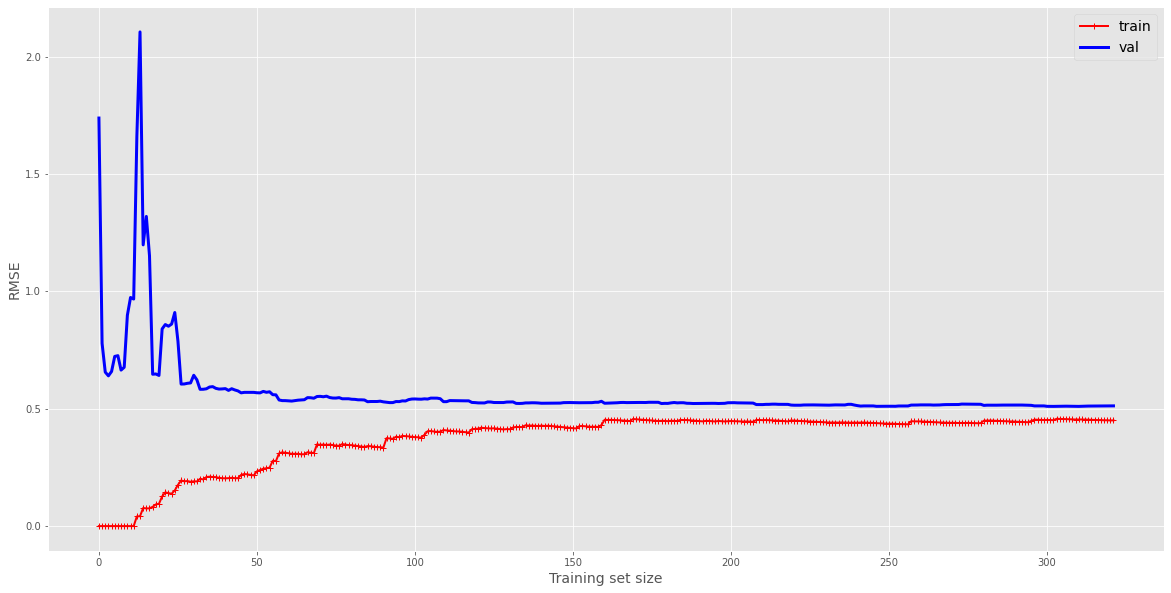

In [28]:
#LinearRegression Learning Curve:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train, lmv_train)

The linear model learning curve appears to generalize well. With few rows within the training set, the model clearly over fits and generalizes poorly. However, once the training model hits 40-50 rows, the model fits the data nicely and generalizes just as well as it performs.

Mean RMSE for RidgeRegression with alpha = 0.001:  0.4812805100075875
Mean RMSE for RidgeRegression with alpha =  0.01:  0.48127856637648786
Mean RMSE for RidgeRegression with alpha =   0.1:  0.4812593960274751
Mean RMSE for RidgeRegression with alpha =     1:  0.4810927437904421
Mean RMSE for RidgeRegression with alpha =    10:  0.48097695254157513
Mean RMSE for RidgeRegression with alpha =   100:  0.5026862911347016
Mean RMSE for RidgeRegression with alpha =  1000:  0.6603576645237962


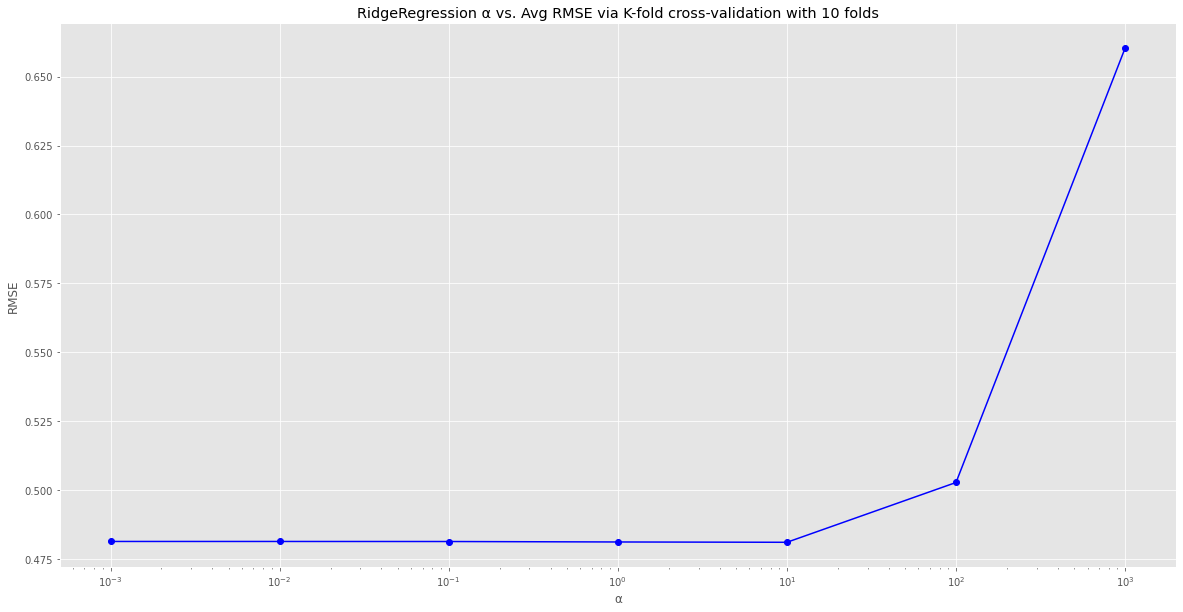

In [29]:
#Now look at optimizing RidgeRegression:
al_list = [0.001,0.01,0.1,1,10,100,1000]
ridge_rmse = []
for i in al_list:
    ridge_reg = Ridge(alpha = i, solver = "cholesky")
    scores = cross_val_score(ridge_reg, X_train, lmv_train, scoring = "neg_mean_squared_error", cv = 10)
    ridgereg_rmse_scores = np.sqrt(-scores)
    print("Mean RMSE for RidgeRegression with alpha = {:>5}: ".format(i),ridgereg_rmse_scores.mean())
    ridge_rmse.append(ridgereg_rmse_scores.mean())

plt.figure(figsize = (20,10))    
plt.plot(al_list, ridge_rmse, 'bo-')
plt.xscale("log")
plt.xlabel("\u03B1")
plt.ylabel("RMSE")
plt.title("RidgeRegression \u03B1 vs. Avg RMSE via K-fold cross-validation with 10 folds")
plt.show()

Looking at the work above, it is clear that the RidgeRegression model is optimized, has the lowest avg. RMSE with an alpha value around 10. 

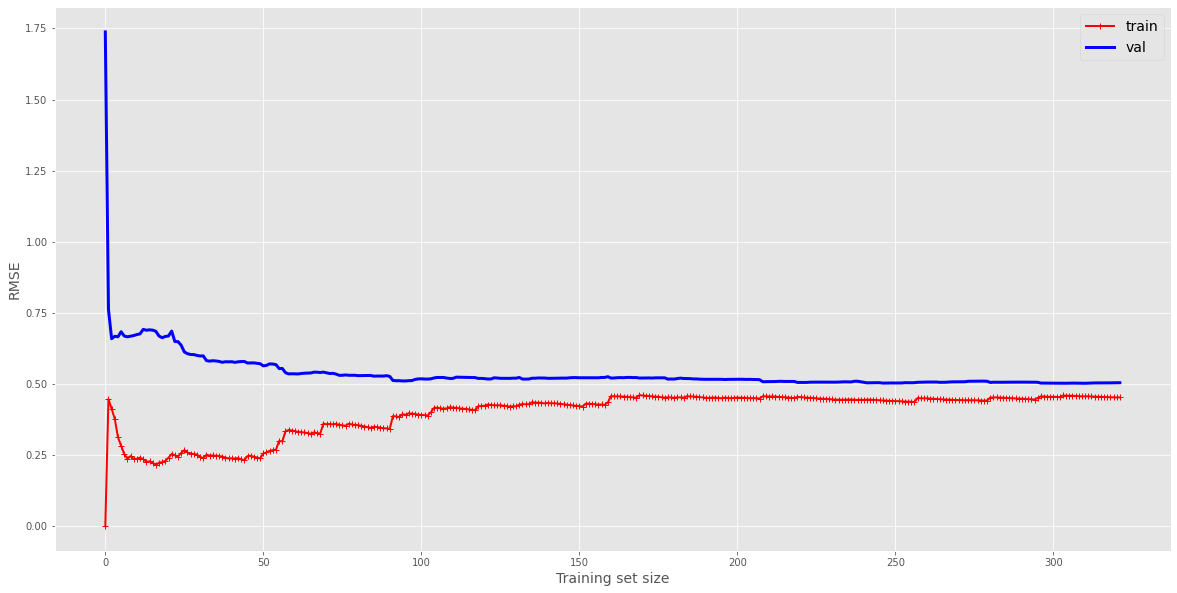

In [30]:
#Now look at Ridge Regression learning curve
ridge_reg = Ridge(alpha = 10, solver = "cholesky")
plot_learning_curves(ridge_reg, X_train, lmv_train)

The RidgeRegression learning curve indicates again that RidgeRegression is outperforming LinearRegression. Even with few rows in the data set, the RidgeRegression model with alpha =10 genearlizes much better when looking at the validation data set. It appears the RidgeRegression model does need far more data to ensure proper ability to generalize when compared to the LinearRegression model.

Mean RMSE for LassoRegression with alpha = 0.001:  0.48105316108487434
Mean RMSE for LassoRegression with alpha =  0.01:  0.48324372120854064
Mean RMSE for LassoRegression with alpha =   0.1:  0.5279494426752034
Mean RMSE for LassoRegression with alpha =     1:  1.000399086069605
Mean RMSE for LassoRegression with alpha =    10:  1.000399086069605
Mean RMSE for LassoRegression with alpha =   100:  1.000399086069605
Mean RMSE for LassoRegression with alpha =  1000:  1.000399086069605


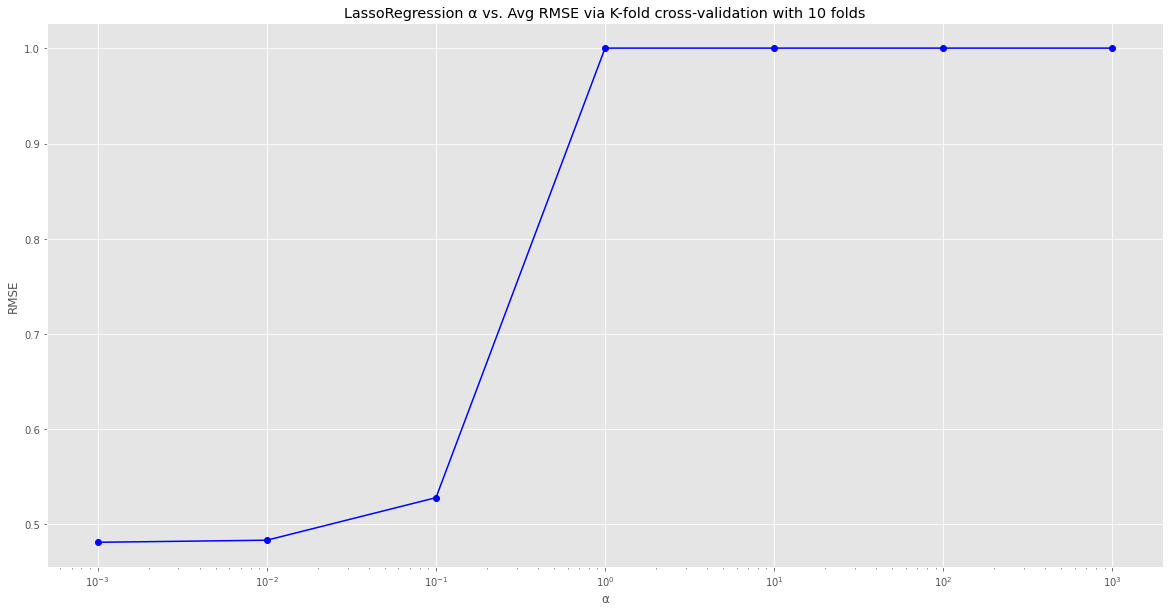

In [31]:
#Now look at optimizing Lasso Regression:
al_list = [0.001,0.01,0.1,1,10,100,1000]
lasso_rmse = []
for i in al_list:
    lasso_reg = Lasso(alpha = i)
    scores = cross_val_score(lasso_reg, X_train, lmv_train, scoring = "neg_mean_squared_error", cv = 10)
    lasso_reg_rmse_scores = np.sqrt(-scores)
    print("Mean RMSE for LassoRegression with alpha = {:>5}: ".format(i),lasso_reg_rmse_scores.mean())
    lasso_rmse.append(lasso_reg_rmse_scores.mean())
    
plt.figure(figsize=(20,10))
plt.plot(al_list, lasso_rmse, 'bo-')
plt.xscale("log")
plt.xlabel("\u03B1")
plt.ylabel("RMSE")
plt.title("LassoRegression \u03B1 vs. Avg RMSE via K-fold cross-validation with 10 folds")
plt.show()

Here, with very high alpha values, each coefficient will be pushed to zero and the model will just be a flat hyperplane going through the lmv intercept for the average lmv value. Thus, after alpha >= 1, the model won't get any worse. With the Lasso method, we do see some regularization help improve the cost function when compared to LinearRegression. However, the benefit is not much. The very low alpha optimization indicates approaching LinearRegression is optimal for this data.

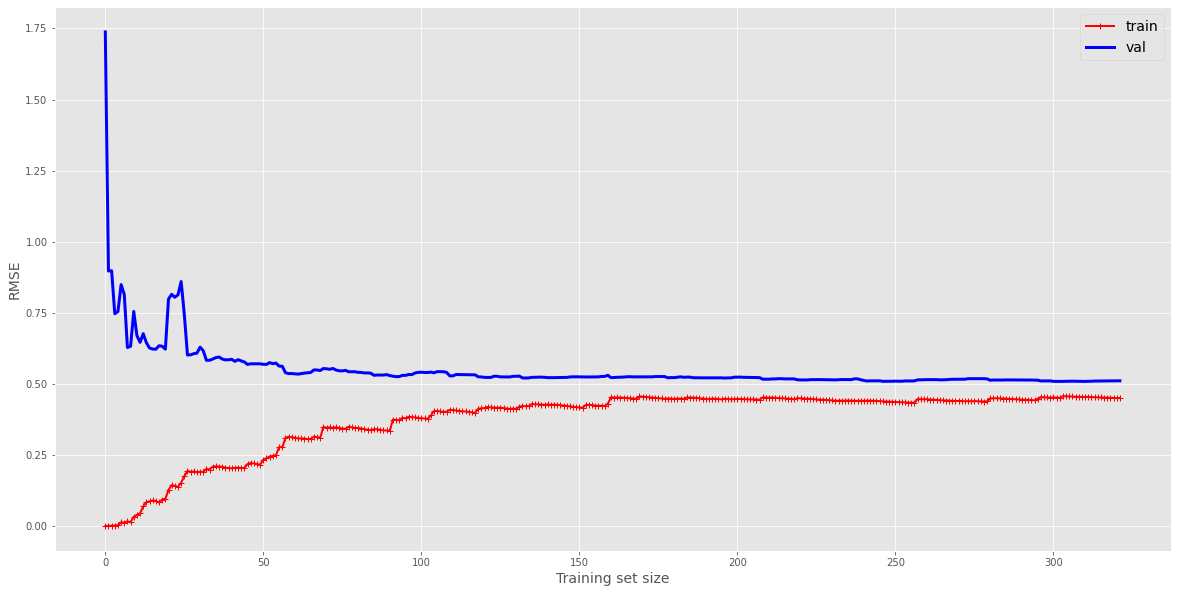

In [32]:
#Now look at Ridge Regression learning curve
lasso_reg = Lasso(alpha = 0.001)
plot_learning_curves(lasso_reg, X_train, lmv_train)

Lasso regression initially generalizes better than LinearRegression, but like Ridge Regression, appears to require over 200 rows of data to improve its ability to generalize.

Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.0:  0.4812058992293914
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.1:  0.4811858229463609
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.2:  0.4811667086543457
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.3:  0.4811485204086307
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.4:  0.48113151180595726
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.5:  0.4811156986328415
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.6:  0.4811006639806532
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.7:  0.4810865290808435
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.8:  0.48107435045927743
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 0.9:  0.48106310954197234
Mean RMSE for Elastic Net with alpha = 0.001 and ratio = 1.0:  0.48105316108487434


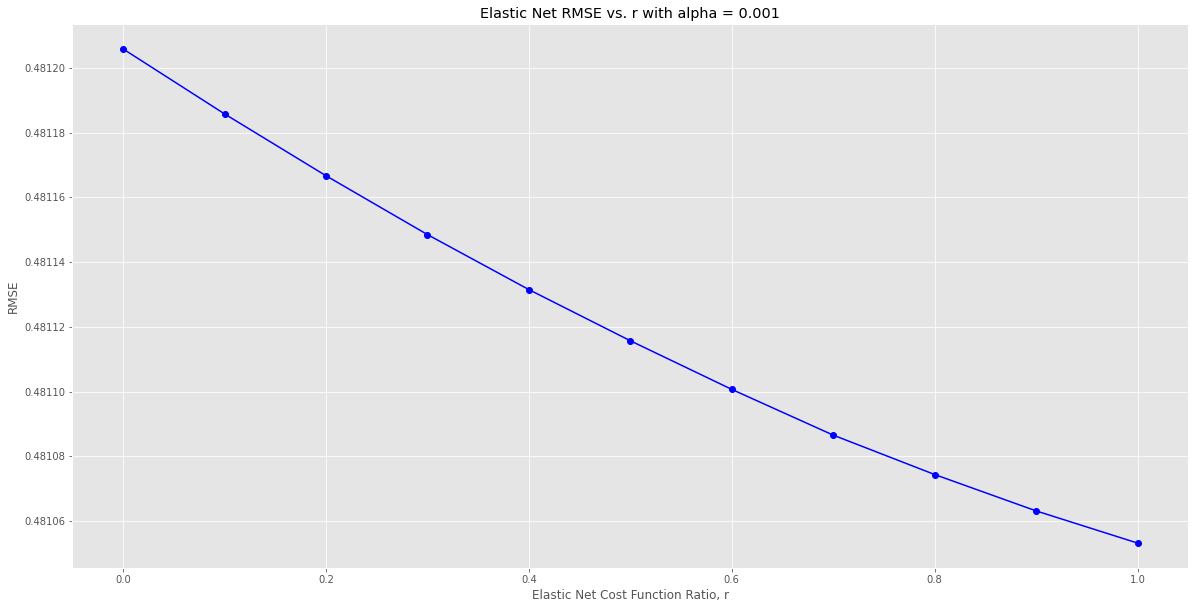

In [33]:
#Look at the impact of ratio on Elastic Net:
#use alpha = 0.001
a = 0.001 
r_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
en_rmse = []
for j in r_list:
    en = ElasticNet(alpha = a, l1_ratio = j)
    scores = cross_val_score(en, X_train, lmv_train, scoring = "neg_mean_squared_error", cv = 10)
    en_reg_rmse_scores = np.sqrt(-scores)
    print("Mean RMSE for Elastic Net with alpha = 0.001 and ratio = {:>2}: ".format(j),en_reg_rmse_scores.mean())
    en_rmse.append(en_reg_rmse_scores.mean())

plt.figure(figsize = (20,10))    
plt.plot(r_list, en_rmse, 'bo-')
plt.xlabel("Elastic Net Cost Function Ratio, r")
plt.ylabel("RMSE")
plt.title("Elastic Net RMSE vs. r with alpha = 0.001")
plt.show()

Here we see that the ElasticNet algorithm is a clear mix between Ridge Regression and Lasso Regression. With r = 0, we replicate the RidgeRegression RMSE output and with r = 1 we replicate the LassoRegression output. 

Now it is time to evaluate our models on the test data. It appears that the best model will be Ridge Regression with alpha = 10 when compared to the lmv scaled values. But for academic purpose, I will see how other models generlize to the test data set as well. The other top models were Lasso with alpha = 0.001, and LinearRegression.

In [34]:
#Write function to evaluate our top models:
def Final_Model_Check(model, X, y):
  predictions = model.predict(X)
  mse = mean_squared_error(y,predictions)
  print("Model {}".format(model),"\nRMSE: {}".format(np.sqrt(mse)))


In [35]:
#Top Model: Ridge with alpha = 10
ridge_reg = Ridge(alpha = 10, solver = "cholesky")
ridge_reg.fit(X_train, lmv_train)
#Next up: Lasso with alpha = 0.001
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, lmv_train)
#Finally: LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, lmv_train)

Final_Model_Check(ridge_reg, X_test, lmv_test)
Final_Model_Check(lasso_reg, X_test, lmv_test)
Final_Model_Check(lin_reg, X_test, lmv_test)

Model Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001) 
RMSE: 0.47014962257094167
Model Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 
RMSE: 0.46398213680030453
Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
RMSE: 0.46246170697389544


All three models generalized very well and performed better than expected. The test RMSE was lower than the training RMSE outputs indicating the good ability of each function to generalize. However, LinearRegression was the top performer (lowest RMSE) here. The model expected to perform the best, RidgeRegression with alpha = 10 had a RMSE about 1.5% higher than LinearRegression. The models are all close, but very interesting to see the model that training would have indicated to be best, actually ended up being inferior to others!

In [36]:
#Look at cross-validation avg. RMSE and std. Dev for these top models:
ridge_reg = Ridge(alpha = 10, solver = "cholesky")
lasso_reg = Lasso(alpha = 0.001)
lin_reg = LinearRegression()
models = [ridge_reg, lasso_reg, lin_reg]
for i in models:
  Eval_Model(i, X_train, lmv_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

Cross-Validation with 10 folds results:

Scores:  [0.4538763  0.4421837  0.51262693 0.52525042 0.49021375 0.51968184
 0.46736973 0.48872619 0.38169149 0.52814918]

Mean RMSE:  0.48097695254157513

Std. Dev:  0.043718004268026814
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Cross-Validation with 10 folds results:

Scores:  [0.45255322 0.44506254 0.51793966 0.51734145 0.49108416 0.51661142
 0.46907186 0.49067936 0.37763116 0.53255678]

Mean RMSE:  0.48105316108487434

Std. Dev:  0.04442407511184366
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [0.4512627  0.44502058 0.51878221 0.51638343 0.4921714  0.51645396
 0.47094

In [37]:
#Because of findings above, re-test with mv labels to see if these outperform lmv. 
#Top Model: Ridge with alpha = 10
ridge_reg = Ridge(alpha = 10, solver = "cholesky")
ridge_reg.fit(X_train, mv_train)
#Next up: Lasso with alpha = 0.001
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, mv_train)
#Finally: LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, mv_train)

Final_Model_Check(ridge_reg, X_test, mv_test)
Final_Model_Check(lasso_reg, X_test, mv_test)
Final_Model_Check(lin_reg, X_test, mv_test)

Model Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001) 
RMSE: 0.5257102139224914
Model Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 
RMSE: 0.522885050343117
Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
RMSE: 0.5221427668344036


So it does appear that the scaled mv labels do lead to slightly inferior models compared to the scaled lmv labels.

In [38]:
#Take a quick look at the summary statistics of the mv vs lmv scaled data:
mv = boston_scaled[:,12]
lmv = boston_scaled[:,13]

In [39]:
#mv descriptive stats
pd.DataFrame(mv, columns = ["mv"]).describe().transpose()

count          mean      std  ...       50%       75%       max
mv  506.0 -3.962575e-16  1.00099  ... -0.144864  0.269391  2.994751

[1 rows x 8 columns]

In [40]:
pd.DataFrame(lmv, columns = ['lmv']).describe().transpose()

count          mean      std  ...      50%       75%       max
lmv  506.0 -4.384942e-16  1.00099  ...  0.04767  0.451902  2.151329

[1 rows x 8 columns]

The scaled mv and lmv data have slightly different distributions. This was seem above when looking at the histograms. The scaled lmv data looks to have a larger range when compared to the scaled mv data. 

In [41]:
pd.DataFrame(mv_train, columns = ['mv_train']).describe().transpose()

count      mean       std  ...       50%       75%       max
mv_train  404.0  0.029748  1.014577  ... -0.101258  0.422011  2.994751

[1 rows x 8 columns]

In [42]:
pd.DataFrame(lmv_train, columns = ["lmv_train"]).describe().transpose()

count      mean       std  ...       50%       75%       max
lmv_train  404.0  0.027613  1.006526  ...  0.093498  0.585494  2.151329

[1 rows x 8 columns]

There is something about the log median home value that helps with the regression models. The scales are similar so the RMSE values can be compared with both models. The scaled lmv values have a lower min, but higher 25% percentile and median. This data confirms that it is reasonable to compare the RMSE cost functions for the scaled label models as was done above.

# Regression Models Without Scaling Labels

In [43]:
#Just start by re-reading in the data:
boston = pd.read_csv(io.BytesIO(uploaded['boston.csv']))

In [44]:
#Drop the neighborhoods column and add the lmv column:
boston = boston.drop('neighborhood',1)
boston['lmv'] = np.log(boston['mv'])
boston.head()

crim    zn  indus  chas    nox  ...  tax  ptratio  lstat    mv       lmv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3   4.98  24.0  3.178054
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8   9.14  21.6  3.072693
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8   4.03  34.7  3.546740
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7   2.94  33.4  3.508556
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7   5.33  36.2  3.589059

[5 rows x 14 columns]

In [45]:
#Now split the data into a training set and test set:
train, test = train_test_split(boston, test_size = 0.2, random_state = 42)

In [46]:
#Split training sets and test sets into features and labels:
X_train = train[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat']]
mv_train = train.mv
lmv_train = train.lmv
print("X_train.shape:", X_train.shape)
print("mv_train.shape:", mv_train.shape)
print("lmv_train.shape:", lmv_train.shape)

X_train.shape: (404, 12)
mv_train.shape: (404,)
lmv_train.shape: (404,)


In [47]:
X_test = test[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat']]
mv_test = test.mv
lmv_test = test.lmv
print("X_test.shape:", X_test.shape)
print("mv_test.shape:", mv_test.shape)
print("lmv_test.shape:", lmv_test.shape)

X_test.shape: (102, 12)
mv_test.shape: (102,)
lmv_test.shape: (102,)


In [48]:
#Now scale the feature arrays with StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)
print("X_train scaled means:", scaler_train.mean_)
print("\nX_train scale:", scaler_train.scale_)
print("\nX_test scaled means:", scaler_test.mean_)
print("\nX_test scale:", scaler_test.scale_)

X_train scaled means: [3.60912463e+00 1.15693069e+01 1.09850495e+01 7.17821782e-02
 5.56484158e-01 6.31589109e+00 6.85564356e+01 3.80819505e+00
 9.35643564e+00 4.04032178e+02 1.83183168e+01 1.24573515e+01]

X_train scale: [8.86406744e+00 2.31238090e+01 6.88607935e+00 2.58126901e-01
 1.17558710e-01 7.08573178e-01 2.79602535e+01 2.12858714e+00
 8.57908366e+00 1.65966869e+02 2.22594093e+00 7.10157559e+00]

X_test scaled means: [3.63094676e+00 1.05490196e+01 1.17377451e+01 5.88235294e-02
 5.47608824e-01 6.16083333e+00 6.86480392e+01 3.74294902e+00
 1.03137255e+01 4.24892157e+02 1.89990196e+01 1.34282353e+01]

X_test scale: [7.42295052e+00 2.39648957e+01 6.68954143e+00 2.35294118e-01
 1.08068634e-01 6.60563278e-01 2.87488951e+01 2.00086781e+00
 9.11686693e+00 1.76590415e+02 1.79172910e+00 7.20900056e+00]


In [49]:
#Example with LinearRegression()
lin_reg = LinearRegression()
lin_reg.fit(X_train, mv_train)
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(mv_train, predictions)
print("LinReg RMSE:", np.sqrt(lin_mse))

LinReg RMSE: 4.696882181263369


In [50]:
#Now re-conduct evaluations of a list of linear models with alpha =1, r = 0.5 to the scaled mv labels:
lin_reg = LinearRegression()
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
lasso_reg =  Lasso(alpha = 1)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
models = [lin_reg, ridge_reg, lasso_reg, elastic_net]
for i in models:
  Eval_Model(i, X_train, mv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [3.98577367 4.24493363 5.49908431 6.55239777 4.57646111 5.09276928
 4.6874387  4.45610973 3.97868074 5.58740169]

Mean RMSE:  4.8661050638392815

Std. Dev:  0.7776992985373647
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

Cross-Validation with 10 folds results:

Scores:  [3.99347328 4.23996371 5.49256413 6.55388557 4.58100711 5.0974087
 4.68366537 4.4490759  3.97015509 5.58513554]

Mean RMSE:  4.864633440774187

Std. Dev:  0.7782212106594139
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Cross-Validation with 10 folds results:

Scores:  [4.95446743 4.73547308 6.04910844 6.52151452 5.68677659 5.78049759
 5.90546632 4.415544

In [51]:
#Now re-conduct evaluations of a list of linear models with alpha =1, r = 0.5 to the scaled lmv labels:
lin_reg = LinearRegression()
ridge_reg =  Ridge(alpha = 1, solver = "cholesky")
lasso_reg =  Lasso(alpha = 1)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
models = [lin_reg, ridge_reg, lasso_reg, elastic_net]
for i in models:
  Eval_Model(i, X_train, lmv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross-Validation with 10 folds results:

Scores:  [0.18405701 0.18151103 0.21159626 0.21061787 0.20074248 0.21064664
 0.19208462 0.20036783 0.1539613  0.21741988]

Mean RMSE:  0.19630049162804492

Std. Dev:  0.01818261325824931
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

Cross-Validation with 10 folds results:

Scores:  [0.18417749 0.18132267 0.21122358 0.21104461 0.20047289 0.2107604
 0.19179446 0.2001964  0.15403536 0.21718875]

Mean RMSE:  0.19622166046194872

Std. Dev:  0.01815480553880408
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Cross-Validation with 10 folds results:

Scores:  [0.36992512 0.4266281  0.47500605 0.39205078 0.43709508 0.41672141
 0.47677958 0.3

A benefit of not scaling your labels is that the RMSE is in the same unit as your labels. This means RMSE is a more tangible value. It essentially tells you how much on average your model is off by in the units of your label. But it also means that it is hard to evaluate between mv and lmv models because of their different scales.